<a href="https://colab.research.google.com/github/lochana/pv/blob/main/DrugsComA03FA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/lochana/pv/main/DrugsComA03FA01.csv'
df = pd.read_csv(url)
display (df)
df.isna().sum()

,web-scraper-order,web-scraper-start-url,name,duration,date,review,rating,likes
0,1653111937-312,https://www.drugs.com/comments/metoclopramide/...,Mrs. DJ,"January 26, 2016","January 26, 2016",Reglan (metoclopramide) for Nausea/Vomiting:\t...,1 / 10,16
1,1653111712-59,https://www.drugs.com/comments/metoclopramide/...,Lisa,Taken for 1 to 6 months,"January 11, 2022",For GERD:\t\t“This was so awful it gave me sid...,1 / 10,0
2,1653111774-118,https://www.drugs.com/comments/metoclopramide/...,Wheels 123,"September 8, 2016","September 8, 2016",Reglan (metoclopramide) for Lactation Augmenta...,10 / 10,3
3,1653111886-258,https://www.drugs.com/comments/metoclopramide/...,Red C.,Taken for less than 1 month,"April 30, 2014",Reglan (metoclopramide) for Migraine:\t\t“Had ...,2 / 10,15
4,1653111953-339,https://www.drugs.com/comments/metoclopramide/...,August Winterman,"January 23, 2017","January 23, 2017",Reglan (metoclopramide) for Nausea/Vomiting:\t...,10 / 10,16
...,...,...,...,...,...,...,...,...
470,1653111774-121,https://www.drugs.com/comments/metoclopramide/...,Tea,Taken for less than 1 month,"May 31, 2018",For Nausea/Vomiting:\t\t“Prescribed for mornin...,1 / 10,2
471,1653111805-174,https://www.drugs.com/comments/metoclopramide/...,Pattie4444,"February 21, 2017","February 21, 2017",For Migraine:\t\t“After suffering the worst mi...,7 / 10,5
472,1653111906-295,https://www.drugs.com/comments/metoclopramide/...,Jj22,Taken for 1 to 6 months,"October 9, 2019",For Nausea/Vomiting:\t\t“I take this Maxolon f...,10 / 10,7
473,1653111774-119,https://www.drugs.com/comments/metoclopramide/...,Norby,Taken for less than 1 month,"January 13, 2019",For Migraine:\t\t“I was administered 10mg of M...,1 / 10,2


web-scraper-order         0
web-scraper-start-url     0
name                      0
duration                  0
date                      0
review                    0
rating                   48
likes                     0
dtype: int64

# New Section

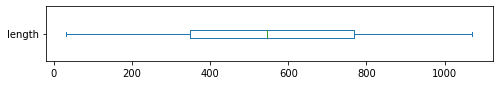

In [ ]:
df['length'] = df['review'].str.len()
df['length'].plot(kind='box', vert=False, figsize=(8, 1))
